In [30]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import seaborn as sns 
sns.set_style("dark")

In [3]:
PATH='../../../kaggle_data/whale/'
sz=224

In [4]:
! ls {PATH}

sample_submission.csv test.zip              train.csv
test                  train                 train.zip


In [5]:
arch=resnet18

In [24]:
data=ImageClassifierData.from_csv(PATH,'train',PATH+'train.csv',tfms=tfms_from_model(arch,sz,crop_type=CropType.NO),val_idxs=[-1])

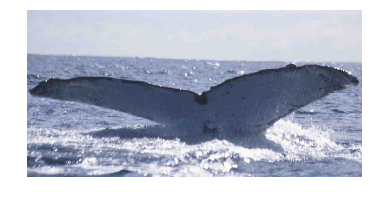

In [36]:
plt.axis('off')
plt.imshow(data.trn_ds.get_x(190))

In [26]:
learn=ConvLearner.pretrained(arch,data,precompute=True)

100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


In [28]:
learn.fit(1e-2,1)

epoch      trn_loss   val_loss   accuracy                   
    0      8.375324   9.319346   0.0       



[array([9.31935]), 0.0]

In [29]:
learn.lr_find()

 92%|█████████▏| 142/154 [00:30<00:02,  4.73it/s, loss=51.9]

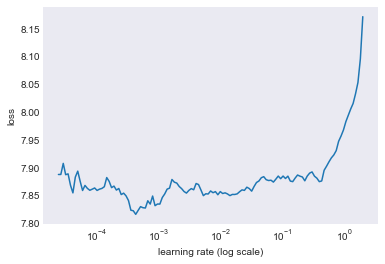

In [31]:
learn.sched.plot()

In [49]:
learn.fit(1e-2,1,cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      5.736113   9.033958   0.0       


[array([9.03396]), 0.0]

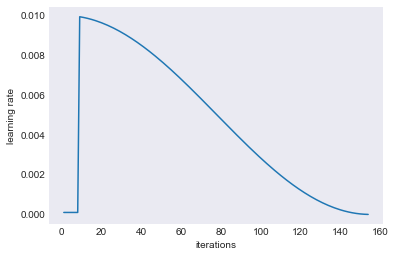

In [50]:
learn.sched.plot_lr()

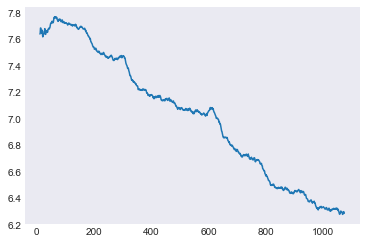

In [42]:
learn.sched.plot_loss()